## Tải dữ liệu

In [1]:
import pandas as pd
df_train = pd.read_csv('../data/01_raw/train.csv')
df_test = pd.read_csv('../data/01_raw/test.csv')

## Xem thông tin từ tập train

In [ ]:
df_train.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


In [7]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Nhận xét:

Có 3 cột bị thiếu dữ liệu: Popularity (vài trăm dòng điền mean vào dc), key(thiếu cũng cũng điền mode duoc), instrumentalness(nhạc không có lời thiếu nhiều chắc nên điền 0 để phân loại). Ở cột duration_in min/ms.Min = 0.50165: Chắc chắn là đơn vị Phút. Max = 1,477,187: Chắc chắn là đơn vị Mili-giây.Mean = 200,094: Đa số dữ liệu là Mili-giây. Cho thấy dữ liệu bị lẫn lộn đơn vị. Nếu để nguyên, mô hình sẽ hiểu sai hoàn toàn (ví dụ: bài hát dài 3 phút (giá trị 3) sẽ bị coi là cực ngắn so với bài hát dài 200,000 ms). => Cần làm: Quy đổi tất cả các giá trị nhỏ (ví dụ < 30) ra mili-giây (nhân với 60,000).Cột loudness: Có giá trị Max là 1.342. Thường loudness trong nhạc số là giá trị âm (0 là mức tối đa của digital audio). Giá trị dương có thể là lỗi đo đạc hoặc méo tiếng, nhưng vì số lượng ít nên có thể chấp nhận được hoặc gán về 0.



## Phân tích biến mục tiêu (Class)

⚠️ df_train chưa được load, đang tự động load từ file CSV...
=== BẢNG THỐNG KÊ CHI TIẾT CLASS ===


,Count,Percentage (%)
Class,,
10,3959,27.50
6,2069,14.37
9,2019,14.02
8,1483,10.30
5,1157,8.04
1,1098,7.63
2,1018,7.07
0,500,3.47
7,461,3.20


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26208\2407784226.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, ax=ax[0], palette='viridis')


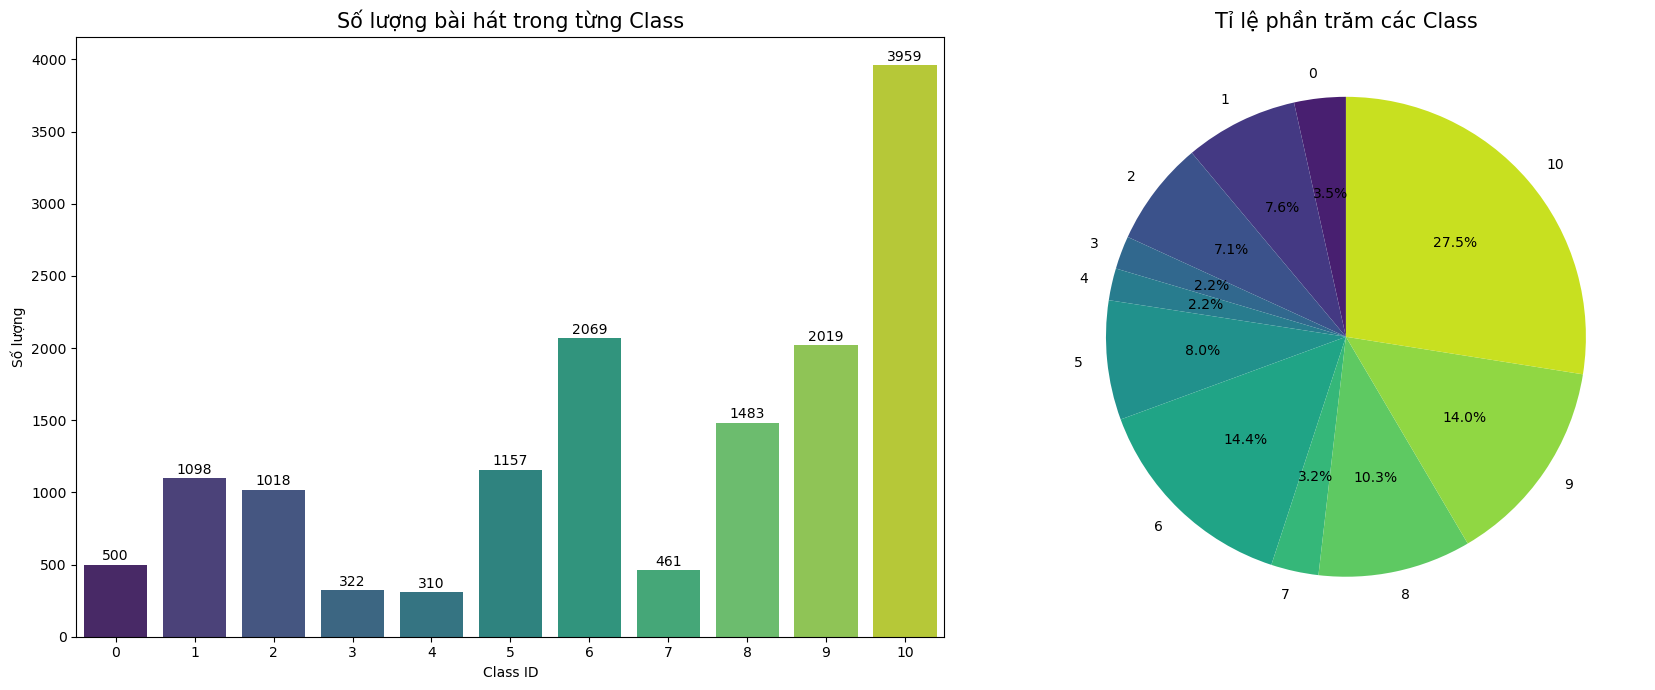


✅ Đã ghi log vào file: ../reports/eda_log.xlsx


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import os

# Kiểm tra xem df_train đã được load chưa
if 'df_train' not in globals():
    df_train = pd.read_csv('../data/01_raw/train.csv')
    print("⚠️ df_train chưa được load, đang tự động load từ file CSV...")

# 1. Tính toán số lượng và tỉ lệ
class_counts = df_train['Class'].value_counts().sort_index() # Sắp xếp theo mã Class 0-10
class_percentages = df_train['Class'].value_counts(normalize=True).sort_index() * 100

# Tạo DataFrame tổng hợp để dễ nhìn
class_summary = pd.DataFrame({
    'Count': class_counts,
    'Percentage (%)': class_percentages.round(2)
})

print("=== BẢNG THỐNG KÊ CHI TIẾT CLASS ===")
display(class_summary.sort_values(by='Count', ascending=False))

# 2. Vẽ biểu đồ (Bar Plot và Pie Chart song song)
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Biểu đồ cột (Bar Plot) - Xem số lượng tuyệt đối
sns.barplot(x=class_counts.index, y=class_counts.values, ax=ax[0], palette='viridis')
ax[0].set_title('Số lượng bài hát trong từng Class', fontsize=15)
ax[0].set_xlabel('Class ID')
ax[0].set_ylabel('Số lượng')
# Thêm số liệu trên đầu cột
for i, v in enumerate(class_counts.values):
    ax[0].text(i, v + 10, str(v), ha='center', va='bottom')

# Biểu đồ tròn (Pie Chart) - Xem tỉ lệ phần trăm
ax[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(class_counts)))
ax[1].set_title('Tỉ lệ phần trăm các Class', fontsize=15)

plt.tight_layout()
plt.show()

# 3. Ghi log vào Excel
log_file = '../reports/eda_log.xlsx'

# Tạo dòng log mới
new_log = pd.DataFrame({
    'Thời gian': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')],
    'Hành động': ['Phân tích phân phối biến mục tiêu (Class) - Vẽ biểu đồ cột và tròn để xem số lượng và tỉ lệ các thể loại nhạc'],
    'Kết luận': ['Dữ liệu mất cân bằng nghiêm trọng: Class 10 chiếm 27.5% (3959 mẫu), trong khi Class 3,4,7 chỉ có 2.2-3.2% (>300 mẫu). Cần áp dụng kỹ thuật cân bằng dữ liệu khi training.']
})

# Kiểm tra file đã tồn tại chưa
if os.path.exists(log_file):
    # Đọc file cũ và thêm dòng mới
    existing_log = pd.read_excel(log_file)
    updated_log = pd.concat([existing_log, new_log], ignore_index=True)
else:
    # Tạo file mới
    updated_log = new_log

# Lưu vào Excel
updated_log.to_excel(log_file, index=False, engine='openpyxl')
print(f"\n✅ Đã ghi log vào file: {log_file}")

Nhận xét:

Dữ liệu bị mất cân bằng Class 10 chiếm tới 27.5% (3959 mẫu), áp đảo hoàn toàn so với các class khác. ác Class 3, 4, 7 có số lượng cực thấp (chỉ khoảng 2.2% - 3.2%, tương đương hơn 300 mẫu)

## EDA cho các biến phân loại (Categorical)

⚠️ df_train chưa được load, đang tự động load từ file CSV...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23508\1556411262.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='key', data=df_train, ax=axes[0], palette='viridis')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23508\1556411262.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mode', data=df_train, ax=axes[1], palette='coolwarm')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23508\1556411262.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Minor (0)', 'Major (1)'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23508\1556411262.py:22: FutureWarning: 

Passing `palette` w

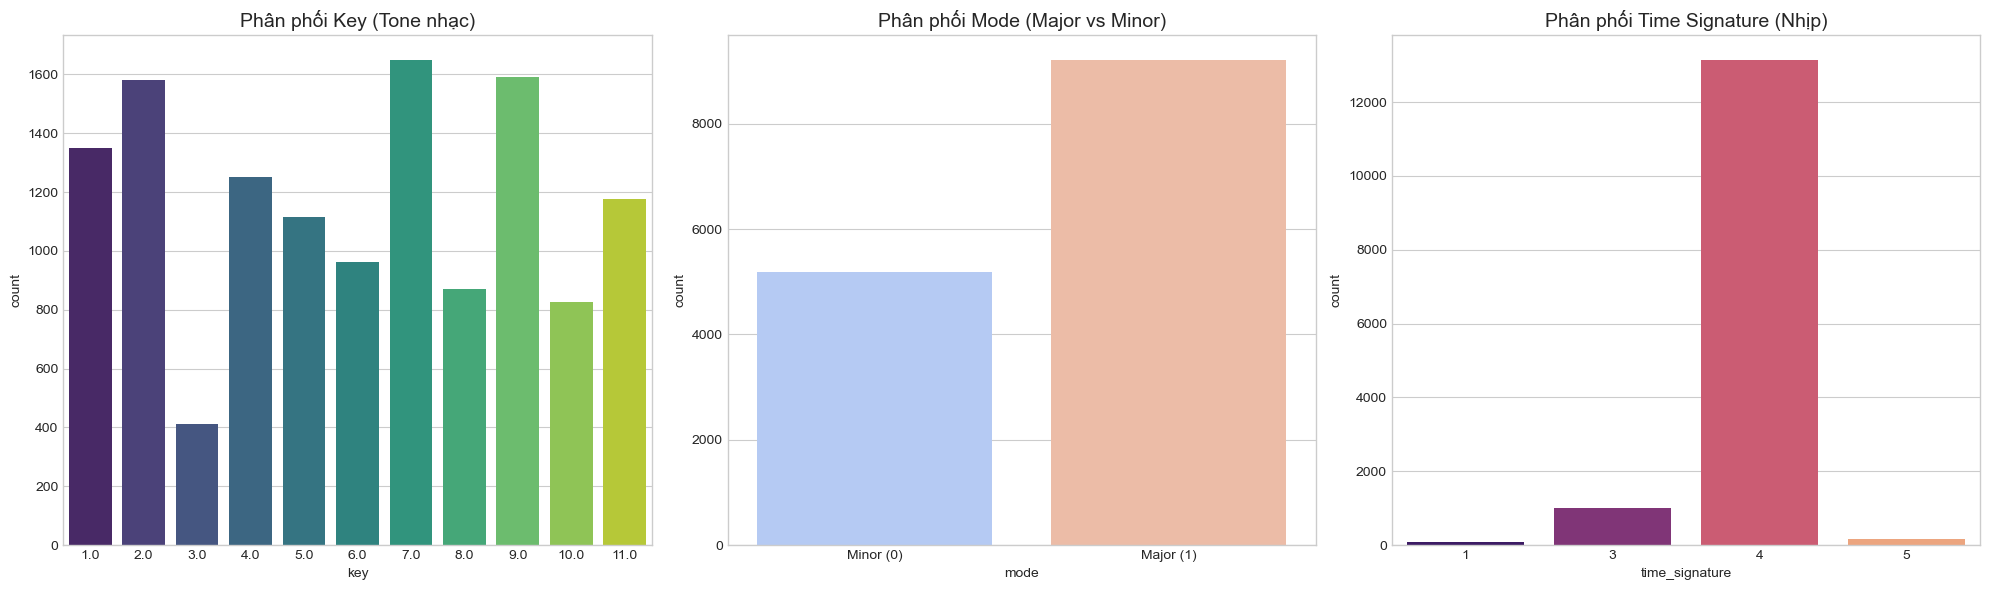

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23508\1556411262.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='mako')


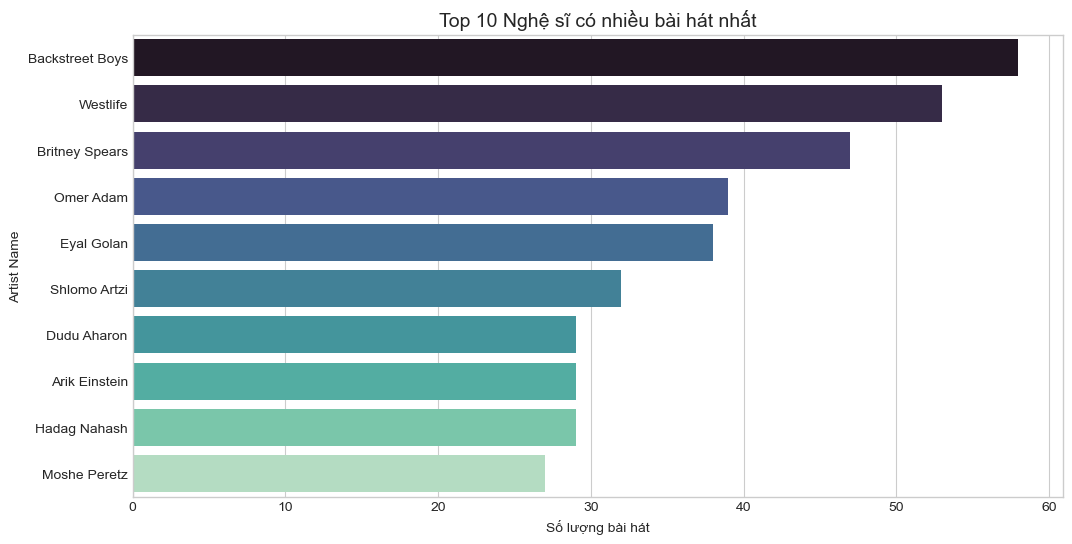

Tổng số nghệ sĩ (Unique Artists): 7913
Tổng số bài hát (Unique Tracks): 12455

✅ Đã ghi log vào file: ../reports/eda_log.xlsx


In [5]:
# Kiểm tra xem df_train đã được load chưa
if 'df_train' not in globals():
    df_train = pd.read_csv('../data/01_raw/train.csv')
    print("⚠️ df_train chưa được load, đang tự động load từ file CSV...")

# Cấu hình chung
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Phân tích 3 biến số Categorical: Key, Mode, Time Signature
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Biểu đồ Key
sns.countplot(x='key', data=df_train, ax=axes[0], palette='viridis')
axes[0].set_title('Phân phối Key (Tone nhạc)', fontsize=14)

# Biểu đồ Mode (0: Minor, 1: Major)
sns.countplot(x='mode', data=df_train, ax=axes[1], palette='coolwarm')
axes[1].set_title('Phân phối Mode (Major vs Minor)', fontsize=14)
axes[1].set_xticklabels(['Minor (0)', 'Major (1)'])

# Biểu đồ Time Signature
sns.countplot(x='time_signature', data=df_train, ax=axes[2], palette='magma')
axes[2].set_title('Phân phối Time Signature (Nhịp)', fontsize=14)

plt.tight_layout()
plt.show()

# 2. Kiểm tra biến Text: Artist Name (Top 10 nghệ sĩ xuất hiện nhiều nhất)
top_artists = df_train['Artist Name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='mako')
plt.title('Top 10 Nghệ sĩ có nhiều bài hát nhất', fontsize=14)
plt.xlabel('Số lượng bài hát')
plt.show()

# In ra thống kê text
print(f"Tổng số nghệ sĩ (Unique Artists): {df_train['Artist Name'].nunique()}")
print(f"Tổng số bài hát (Unique Tracks): {df_train['Track Name'].nunique()}")

# 3. Ghi log vào Excel
log_file = '../reports/eda_log.xlsx'

# Tạo dòng log mới
new_log = pd.DataFrame({
    'Thời gian': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')],
    'Hành động': ['Phân tích các biến phân loại (Categorical): Key, Mode, Time Signature và Top 10 nghệ sĩ xuất hiện nhiều nhất'],
    'Kết luận': ['Key 7.0 (Sol trưởng) xuất hiện nhiều nhất, Key 3.0 ít nhất. Mode Major (1) chiếm ưu thế gấp đôi Minor (0). Time Signature 4/4 chiếm >90% (đặc trưng Pop/Dance/Rock). Có nghệ sĩ có nhiều bài hát trong dataset, cần xem xét để tránh data leakage khi split train/test.']
})

# Kiểm tra file đã tồn tại chưa
if os.path.exists(log_file):
    # Đọc file cũ và thêm dòng mới
    existing_log = pd.read_excel(log_file)
    updated_log = pd.concat([existing_log, new_log], ignore_index=True)
else:
    # Tạo file mới
    updated_log = new_log

# Lưu vào Excel
updated_log.to_excel(log_file, index=False, engine='openpyxl')
print(f"\n✅ Đã ghi log vào file: {log_file}")

Nhận xét:

Key 7.0 (thường là G - Sol trưởng) xuất hiện nhiều nhất. Key 3.0 (thường là D# - Rê thăng) xuất hiện ít nhất. Tỉ lệ Major (1) chiếm ưu thế áp đảo so với Minor (0) (tỉ lệ khoảng 2:1). Điều này phản ánh đúng thực tế: nhạc Pop/Rock đại chúng thường dùng giọng Trưởng (vui tươi/mạnh mẽ) nhiều hơn giọng Thứ (buồn/sâu lắng). Cột Time Signature (Nhịp): Giá trị 4 (Nhịp 4/4): Chiếm tỉ trọng gần như tuyệt đối (> 90%). Đây là đặc điểm của nhạc Pop/Dance/Rock hiện đại. Giá trị 3 (Nhịp 3/4): Có xuất hiện nhưng ít. Đây thường là đặc trưng của nhạc Acoustic, Waltz hoặc một số dòng Ballad. -> Khả năng phân loại tốt cho các dòng này. Giá trị 5: Rất hiếm. Giá trị 1: 1/4 là cực kỳ hiếm trong âm nhạc thực tế. Đây khả năng cao là Outlier hoặc đoạn intro ngắn bị nhận diện sai

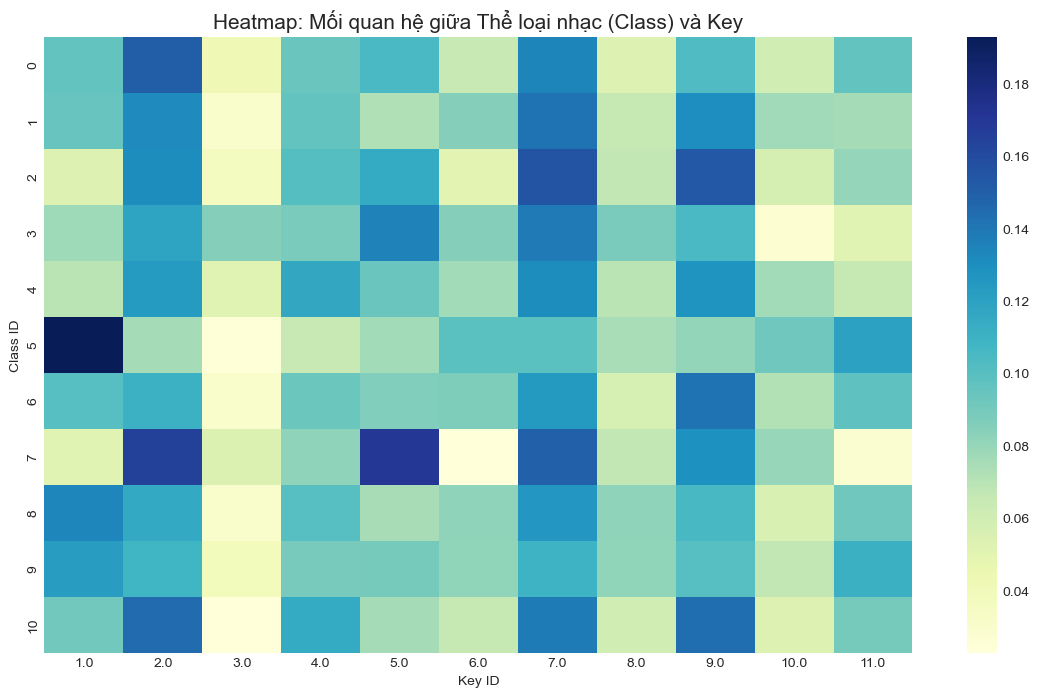


✅ Đã ghi log vào file: ../reports/eda_log.xlsx


In [7]:
# Tạo bảng chéo (Crosstab) giữa Class và Key để xem thể loại nhạc nào thích Key nào
# normalize='index' để tính tỉ lệ % theo từng hàng (từng Class)
key_class_cross = pd.crosstab(df_train['Class'], df_train['key'], normalize='index')

plt.figure(figsize=(14, 8))
sns.heatmap(key_class_cross, annot=False, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap: Mối quan hệ giữa Thể loại nhạc (Class) và Key', fontsize=15)
plt.ylabel('Class ID')
plt.xlabel('Key ID')
plt.show()

# Ghi log vào Excel
new_log = pd.DataFrame({
    'Thời gian': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')],
    'Hành động': ['Phân tích mối quan hệ giữa Class và Key bằng Crosstab Heatmap - Tìm hiểu xem các thể loại nhạc có xu hướng sử dụng tone nhạc (Key) nào'],
    'Kết luận': ['Class 5 có xu hướng sử dụng Key 1.0 áp đảo, Class 7 rất kén chọn tone nhạc (dấu hiệu tốt để phân loại). Key 2, 7, 9 là các tone phổ biến nhất. Key 3.0 và 6.0 ít được sử dụng trong hầu hết các Class.']
})

# Kiểm tra file đã tồn tại chưa
if os.path.exists(log_file):
    existing_log = pd.read_excel(log_file)
    updated_log = pd.concat([existing_log, new_log], ignore_index=True)
else:
    updated_log = new_log

# Lưu vào Excel
updated_log.to_excel(log_file, index=False, engine='openpyxl')
print(f"\n✅ Đã ghi log vào file: {log_file}")

Nhận xét:

Class 5 có xu hướng sử dụng Key 1.0 một cách áp đảo so với các Key khác. Class 7 rất "kén chọn" tone nhạc. Đây là dấu hiệu tốt để phân loại. Các Key 2, 7, 9 có thể là các Tone phổ biến nhất trong âm nhạc đại chúng (ví dụ: Đô trưởng, Sol trưởng...). Cột Key 3.0 và Key 6.0 có màu khá nhạt trên toàn bộ bản đồ (trừ một chút ở Class 3).

## EDA cho biến số (Numerical)

1. Chuẩn bị danh sách cột

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
import os

num_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'Popularity']

# Cấu hình giao diện
sns.set_theme(style="whitegrid")

# Ghi log vào Excel
log_file = '../reports/eda_log.xlsx'

new_log = pd.DataFrame({
    'Thời gian': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')],
    'Hành động': ['Chuẩn bị danh sách các biến số (Numerical) để phân tích EDA - Tổng cộng 11 biến số quan trọng'],
    'Kết luận': ['Đã xác định được 11 biến số cần phân tích: danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_in min/ms, Popularity. Các biến này sẽ được kiểm tra phân phối, outliers và mối tương quan với Class.']
})

# Kiểm tra file đã tồn tại chưa
if os.path.exists(log_file):
    existing_log = pd.read_excel(log_file)
    updated_log = pd.concat([existing_log, new_log], ignore_index=True)
else:
    updated_log = new_log

# Lưu vào Excel
updated_log.to_excel(log_file, index=False, engine='openpyxl')
print(f"✅ Đã ghi log vào file: {log_file}")
print(f"📊 Danh sách {len(num_cols)} biến số đã được chuẩn bị để phân tích EDA")

✅ Đã ghi log vào file: ../reports/eda_log.xlsx
📊 Danh sách 11 biến số đã được chuẩn bị để phân tích EDA


(a) Kiểm tra Phân phối (Histograms & KDE)

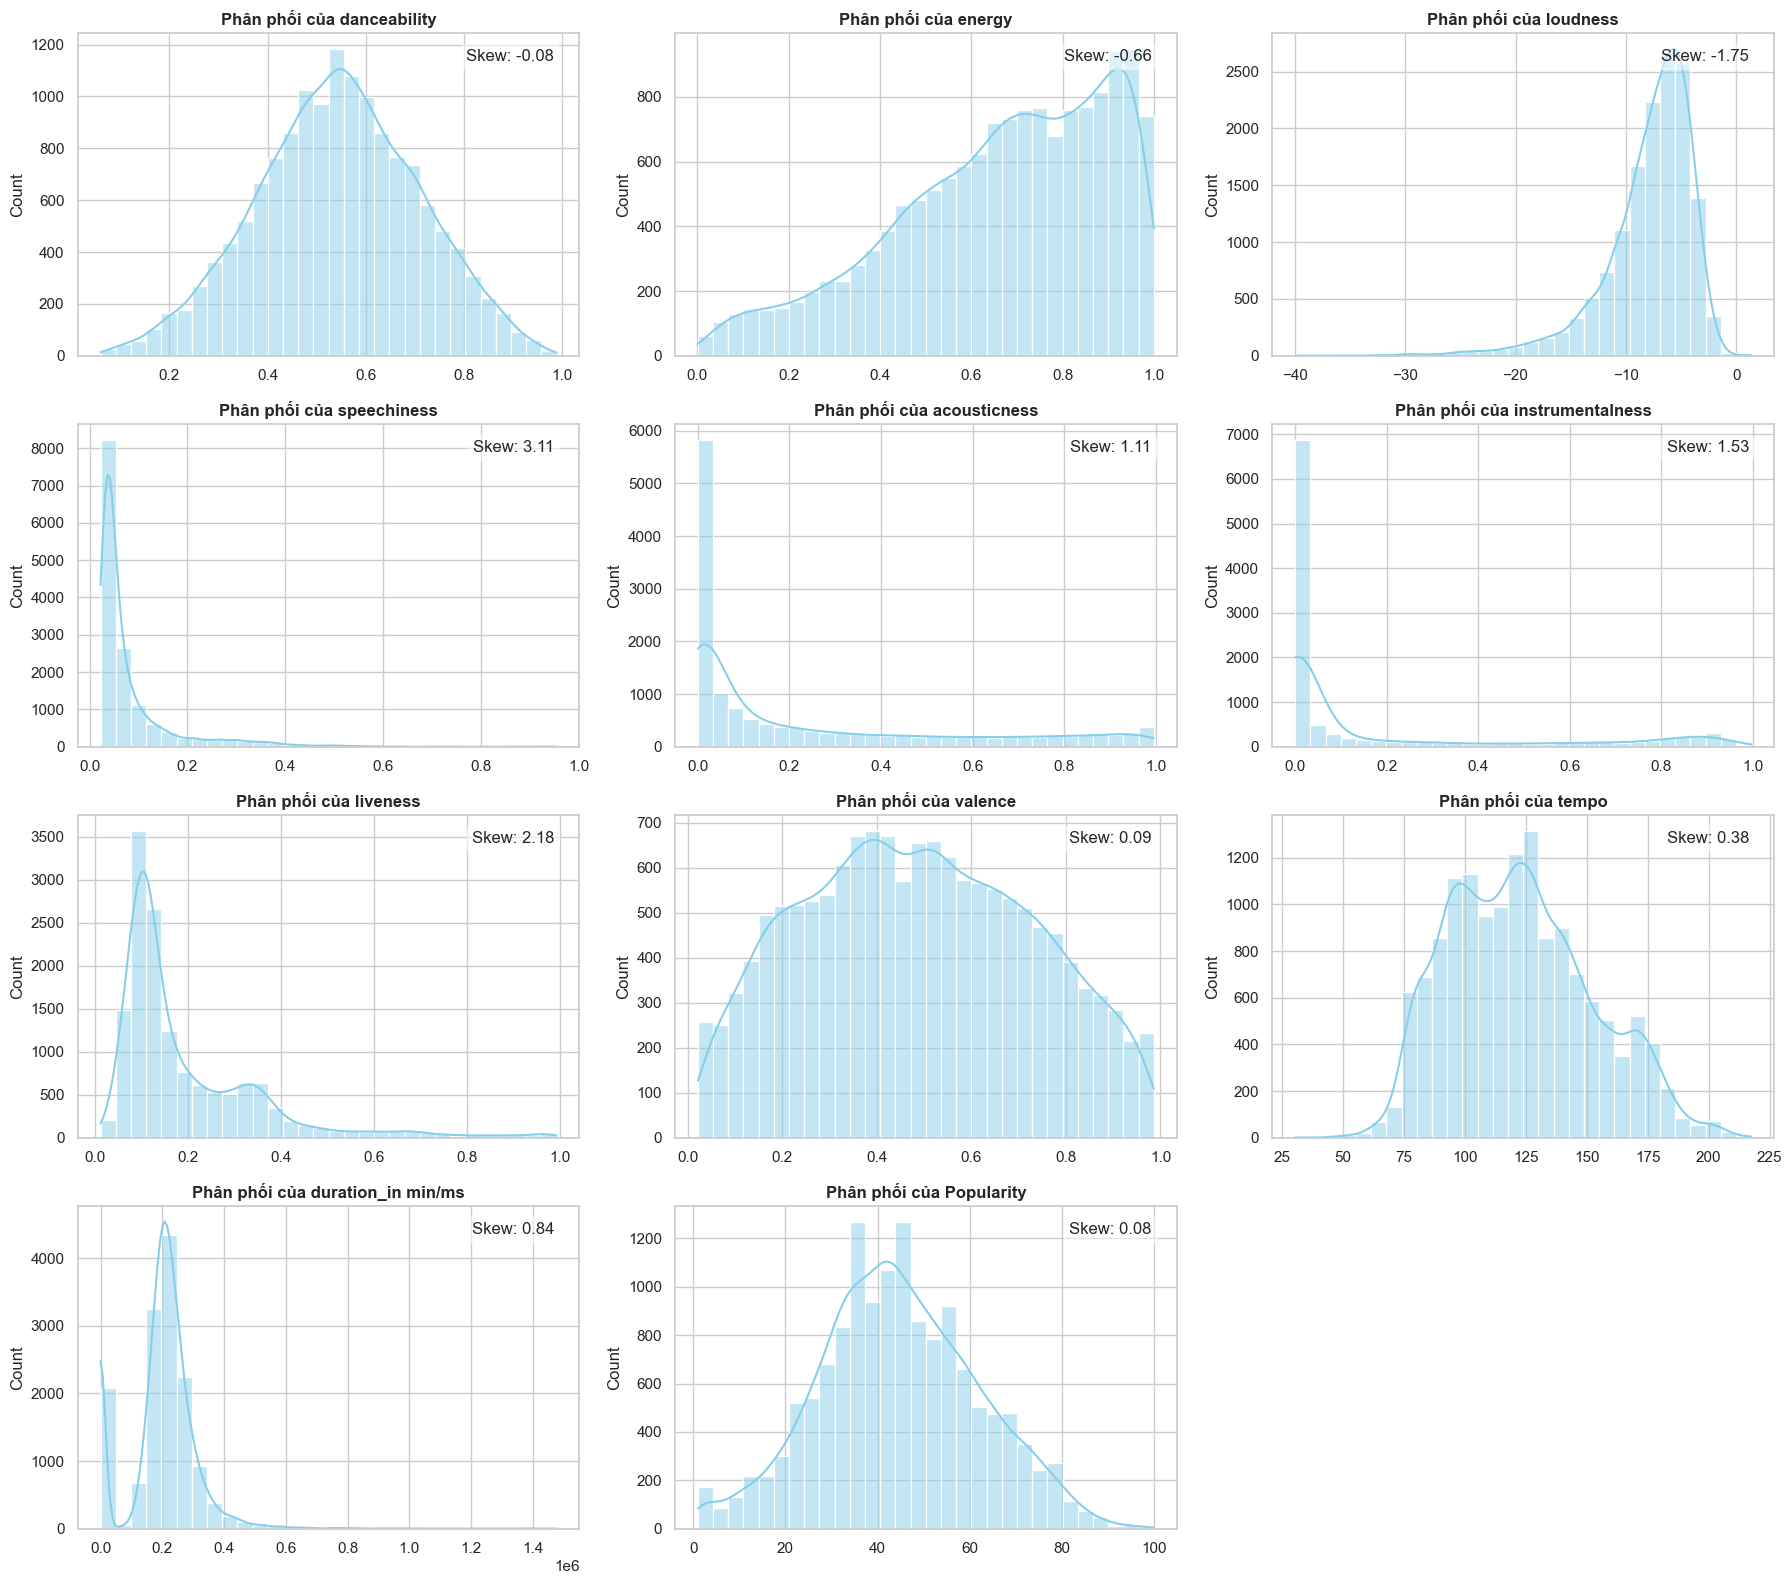


✅ Đã ghi log vào file: ../reports/eda_log.xlsx


In [9]:
# Vẽ biểu đồ phân phối
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # Vẽ Histogram kết hợp đường KDE (Kernel Density Estimate)
    sns.histplot(data=df_train, x=col, kde=True, ax=axes[i], color='skyblue', bins=30)
    
    # Trang trí
    axes[i].set_title(f'Phân phối của {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    
    # Tính độ lệch (Skewness) và hiển thị lên biểu đồ
    skew_val = df_train[col].skew()
    axes[i].text(0.95, 0.95, f'Skew: {skew_val:.2f}', 
                 transform=axes[i].transAxes, ha='right', va='top', 
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Xóa các ô thừa nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Ghi log vào Excel
new_log = pd.DataFrame({
    'Thời gian': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')],
    'Hành động': ['Vẽ Histogram + KDE cho 11 biến số để kiểm tra phân phối và tính Skewness (độ lệch) - Phát hiện biến nào cần transformation'],
    'Kết luận': ['Các biến danceability, valence, tempo, Popularity có phân phối gần chuẩn (Skew thấp). Nhóm speechiness, liveness, acousticness, instrumentalness bị lệch phải nghiêm trọng (Skew > 1) cần Log Transform. duration_in min/ms có 2 đỉnh phân tách rõ ràng (lỗi đơn vị phút/ms) cần xử lý gấp. loudness và energy lệch trái nhẹ, phản ánh xu hướng nhạc năng lượng cao.']
})

# Kiểm tra file đã tồn tại chưa
if os.path.exists(log_file):
    existing_log = pd.read_excel(log_file)
    updated_log = pd.concat([existing_log, new_log], ignore_index=True)
else:
    updated_log = new_log

# Lưu vào Excel
updated_log.to_excel(log_file, index=False, engine='openpyxl')
print(f"\n✅ Đã ghi log vào file: {log_file}")

Nhận xét:

Các biến danceability, valence, tempo và Popularity có dạng phân phối khá chuẩn (Normal-like) hoặc phân phối đều với độ lệch (Skewness) thấp, đây là tín hiệu tốt vì chúng có thể đưa trực tiếp vào mô hình mà không cần biến đổi nhiều; tuy nhiên nhóm biến speechiness, liveness, acousticness và instrumentalness lại bị lệch phải cực kỳ nghiêm trọng (Right-skewed với Skew > 1), đặc biệt là speechiness và instrumentalness tập trung dày đặc tại giá trị 0 cho thấy đa số bài hát trong tập dữ liệu này là nhạc có lời và thu âm phòng thu (studio version), điều này đòi hỏi bắt buộc phải áp dụng kỹ thuật Log Transformation (np.log1p) hoặc Box-Cox để giảm độ lệch giúp mô hình tuyến tính hoạt động hiệu quả hơn; bên cạnh đó biến loudness và energy bị lệch trái nhẹ phản ánh xu hướng chung của dataset là các bài hát năng lượng cao và âm lượng lớn; điểm quan trọng và cấp bách nhất cần lưu ý là biểu đồ duration_in min/ms đang hiển thị rõ rệt hai đỉnh phân tách (một đỉnh nhỏ sát số 0 tương ứng với đơn vị phút và một đỉnh lớn quanh mốc 200.000 tương ứng với đơn vị ms)

(b) Boxplot theo Class

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23508\1328587560.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='Class', y=col, ax=axes[i], palette='viridis')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23508\1328587560.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='Class', y=col, ax=axes[i], palette='viridis')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23508\1328587560.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='Class', y=col, ax=axes[i], palette='viridis')
C:\Users\ADMIN\A

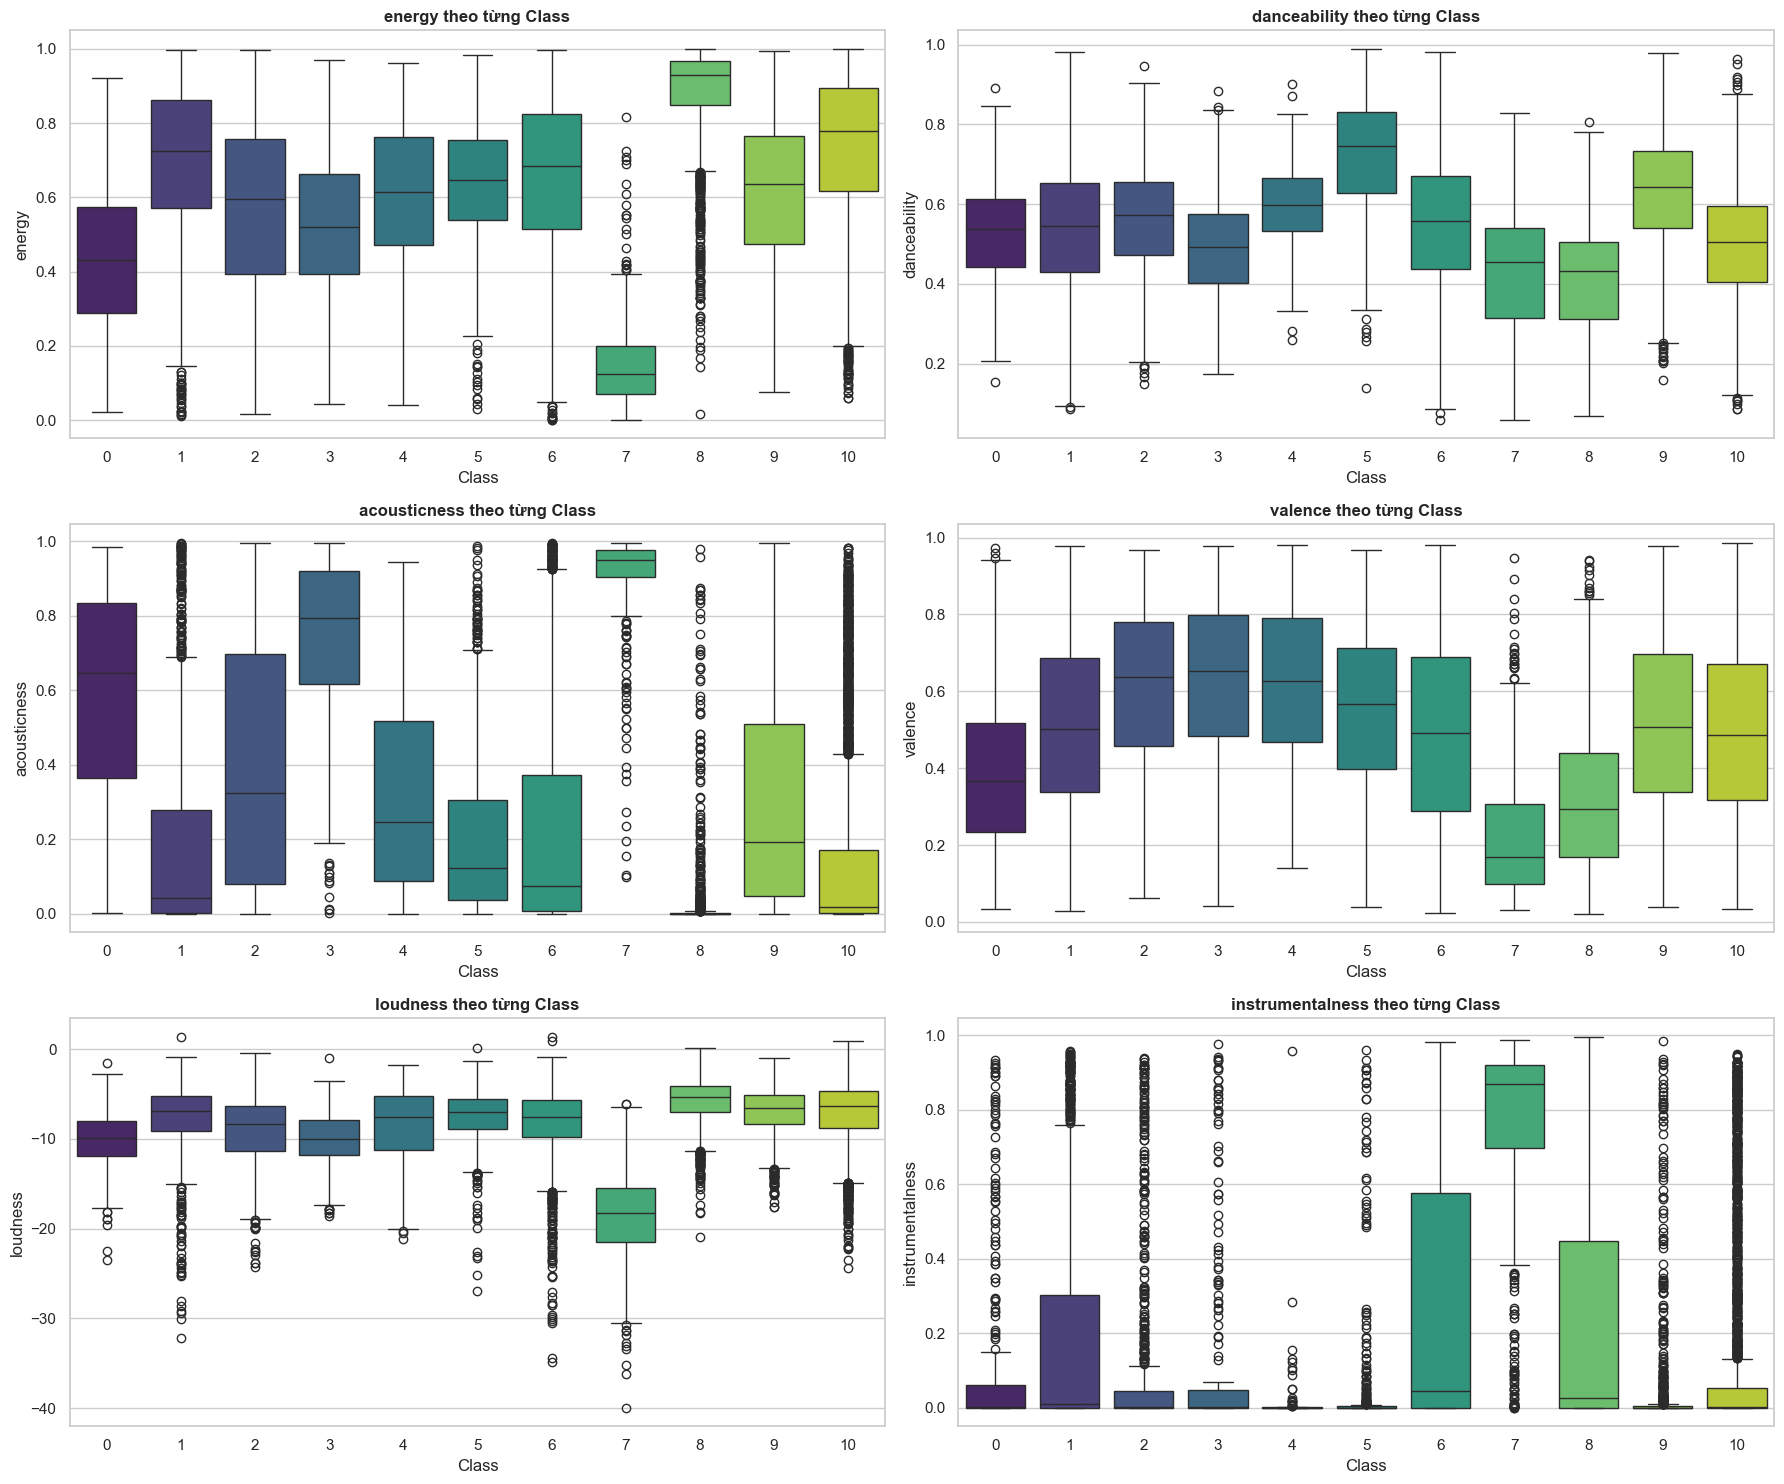


✅ Đã ghi log vào file: ../reports/eda_log.xlsx


In [10]:
# Chọn ra các đặc trưng quan trọng nhất để soi kỹ
key_features = ['energy', 'danceability', 'acousticness', 'valence', 'loudness', 'instrumentalness']

fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(key_features):
    sns.boxplot(data=df_train, x='Class', y=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} theo từng Class', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Ghi log vào Excel
new_log = pd.DataFrame({
    'Thời gian': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')],
    'Hành động': ['Vẽ Boxplot cho 6 đặc trưng quan trọng (energy, danceability, acousticness, valence, loudness, instrumentalness) theo từng Class để phát hiện khả năng phân loại'],
    'Kết luận': ['Class 7 tách biệt hoàn toàn với Energy và Loudness cực thấp, Acousticness và Instrumentalness cực cao (nhạc cổ điển/khí nhạc). Class 8 và 10 có Energy và Loudness cao (Rock/Metal). Instrumentalness là chìa khóa vàng để tách Class 7. Danceability phân hóa tốt giữa Class 5, 9 (cao) và Class 8 (thấp). Energy, Acousticness và Instrumentalness sẽ có Feature Importance cao nhất.']
})

# Kiểm tra file đã tồn tại chưa
if os.path.exists(log_file):
    existing_log = pd.read_excel(log_file)
    updated_log = pd.concat([existing_log, new_log], ignore_index=True)
else:
    updated_log = new_log

# Lưu vào Excel
updated_log.to_excel(log_file, index=False, engine='openpyxl')
print(f"\n✅ Đã ghi log vào file: {log_file}")

Nhận xét:

Biểu đồ boxplot cho thấy khả năng phân loại cực kỳ mạnh mẽ của các đặc trưng số khi làm nổi bật rõ rệt sự khác biệt giữa các nhóm nhạc, cụ thể Class 7 là một trường hợp đặc biệt nhất ("outlier" của cả bộ dữ liệu) với đặc điểm Energy và Loudness thấp kỷ lục trong khi Acousticness và Instrumentalness lại cao vượt trội tiệm cận mức 1.0, cho thấy đây chắc chắn là dòng nhạc cổ điển hoặc khí nhạc êm dịu; trái ngược lại là Class 8 và Class 10 đại diện cho dòng nhạc mạnh (khả năng là Metal hoặc Rock) với Energy rất cao, Loudness lớn và Valence (độ tích cực) cũng cao hơn hẳn; đặc biệt biến Instrumentalness đóng vai trò là "chìa khóa vàng" để tách Class 7 ra khỏi phần còn lại vì hầu hết các Class khác đều có trung vị bằng 0 (nhạc có lời) trong khi Class 7 và một phần Class 6 lại có giá trị này rất cao; ngoài ra Danceability cũng phân hóa tốt khi Class 5 và 9 rất phù hợp để nhảy (trung vị cao) còn Class 8 dù năng lượng cao nhưng lại khó nhảy (Danceability thấp), tổng hợp lại thì các biến Energy, Acousticness và Instrumentalness sẽ là những đặc trưng quan trọng nhất (Feature Importance cao nhất) để mô hình phân biệt các thể loại nhạc trong bài toán này.

(c) Scatter Plot + Hue (Tìm cụm)

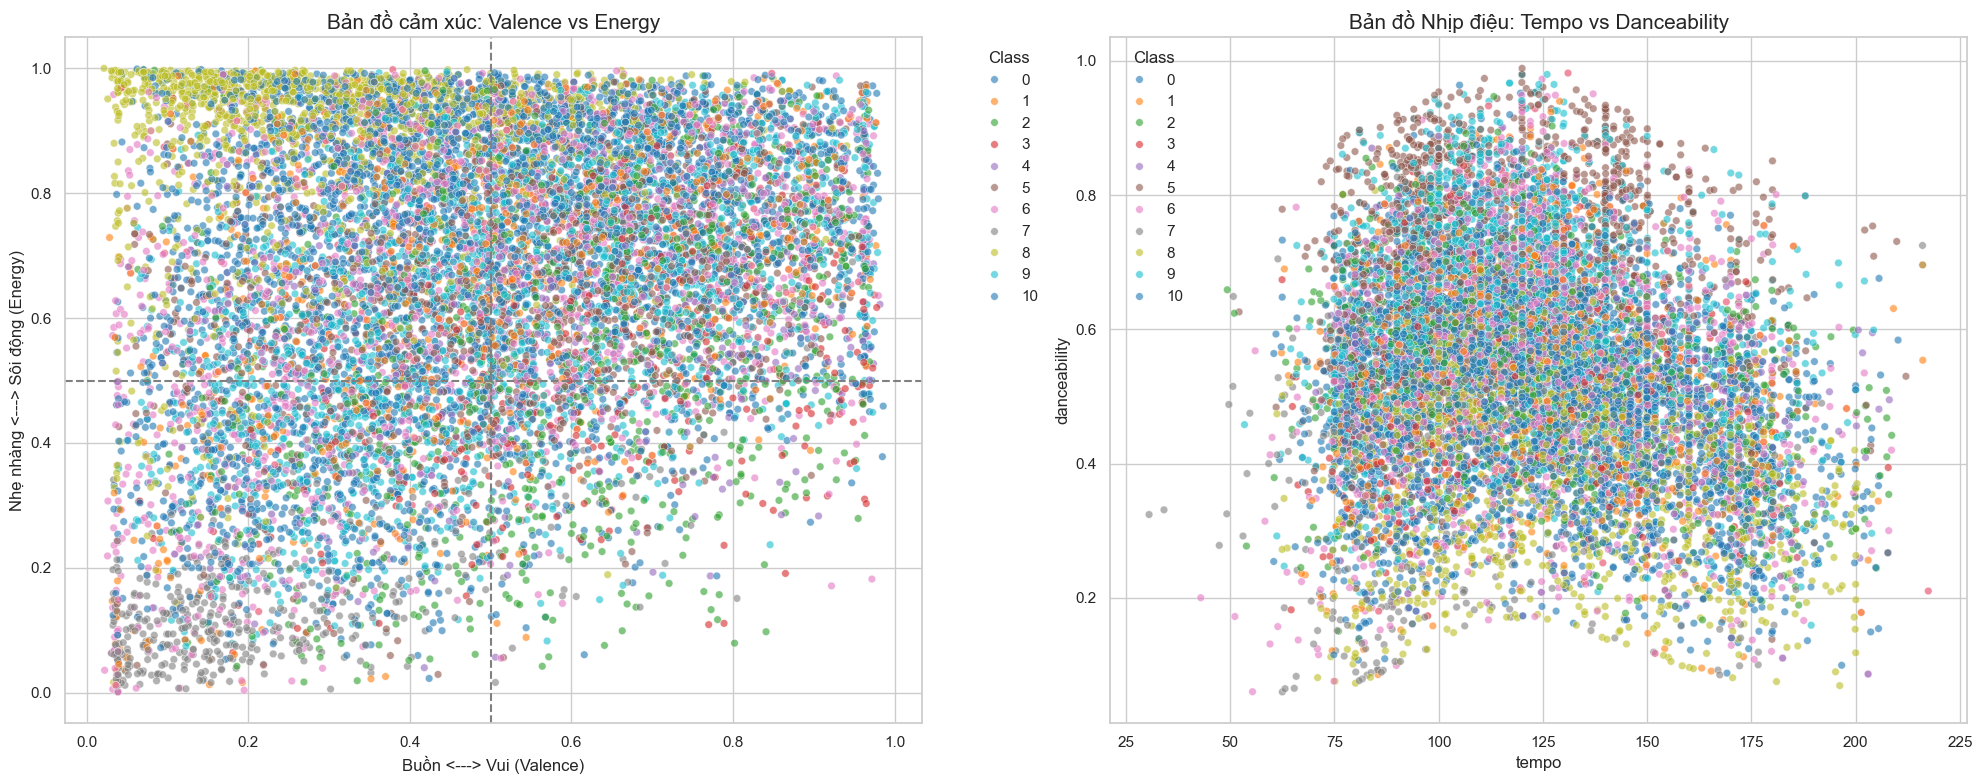


✅ Đã ghi log vào file: ../reports/eda_log.xlsx


In [11]:
# Vẽ scatter plots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. Biểu đồ Cảm xúc: Energy vs Valence
sns.scatterplot(data=df_train, x='valence', y='energy', hue='Class', 
                palette='tab10', alpha=0.6, s=30, ax=axes[0])
axes[0].set_title('Bản đồ cảm xúc: Valence vs Energy', fontsize=15)
axes[0].axhline(0.5, ls='--', color='gray')
axes[0].axvline(0.5, ls='--', color='gray')
axes[0].set_xlabel('Buồn <---> Vui (Valence)')
axes[0].set_ylabel('Nhẹ nhàng <---> Sôi động (Energy)')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Class')

# 2. Biểu đồ Nhịp điệu: Danceability vs Tempo
sns.scatterplot(data=df_train, x='tempo', y='danceability', hue='Class', 
                palette='tab10', alpha=0.6, s=30, ax=axes[1])
axes[1].set_title('Bản đồ Nhịp điệu: Tempo vs Danceability', fontsize=15)

plt.tight_layout()
plt.show()

# Ghi log vào Excel
new_log = pd.DataFrame({
    'Thời gian': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')],
    'Hành động': ['Vẽ Scatter Plot với hue theo Class để tìm các cụm phân biệt - Phân tích 2 không gian: Cảm xúc (Valence vs Energy) và Nhịp điệu (Tempo vs Danceability)'],
    'Kết luận': ['Biểu đồ phân tán cho thấy dày đặc giữa đa số các Class (0,1,2,8,9,10) tại vùng năng lượng cao và cảm xúc tích cực, đòi hỏi thuật toán phi tuyến (XGBoost/Random Forest). Class 7 tách biệt hoàn toàn thành "ốc đảo" ở góc Low Energy - Low Valence. Tempo và Danceability có sự chồng lấn lớn giữa các Class, không phải đặc trưng mạnh để phân loại.']
})

# Kiểm tra file đã tồn tại chưa
if os.path.exists(log_file):
    existing_log = pd.read_excel(log_file)
    updated_log = pd.concat([existing_log, new_log], ignore_index=True)
else:
    updated_log = new_log

# Lưu vào Excel
updated_log.to_excel(log_file, index=False, engine='openpyxl')
print(f"\n✅ Đã ghi log vào file: {log_file}")

Nhận xét:

Biểu đồ phân tán phản ánh rõ dày đặc giữa đa số các Class (đặc biệt là 0, 1, 2, 8, 9, 10) tại khu vực năng lượng cao và cảm xúc tích cực (góc trên bên phải biểu đồ Valence-Energy), điều này báo hiệu các mô hình tuyến tính đơn giản sẽ gặp khó khăn lớn và cần đến các thuật toán phi tuyến tính mạnh mẽ như XGBoost hay Random Forest để phân tách ranh giới; tuy nhiên điểm sáng là Class 7 lại một lần nữa tách biệt hoàn toàn thành một "ốc đảo" riêng ở góc dưới bên trái (Low Energy, Low Valence)

## Kiểm tra tương quan

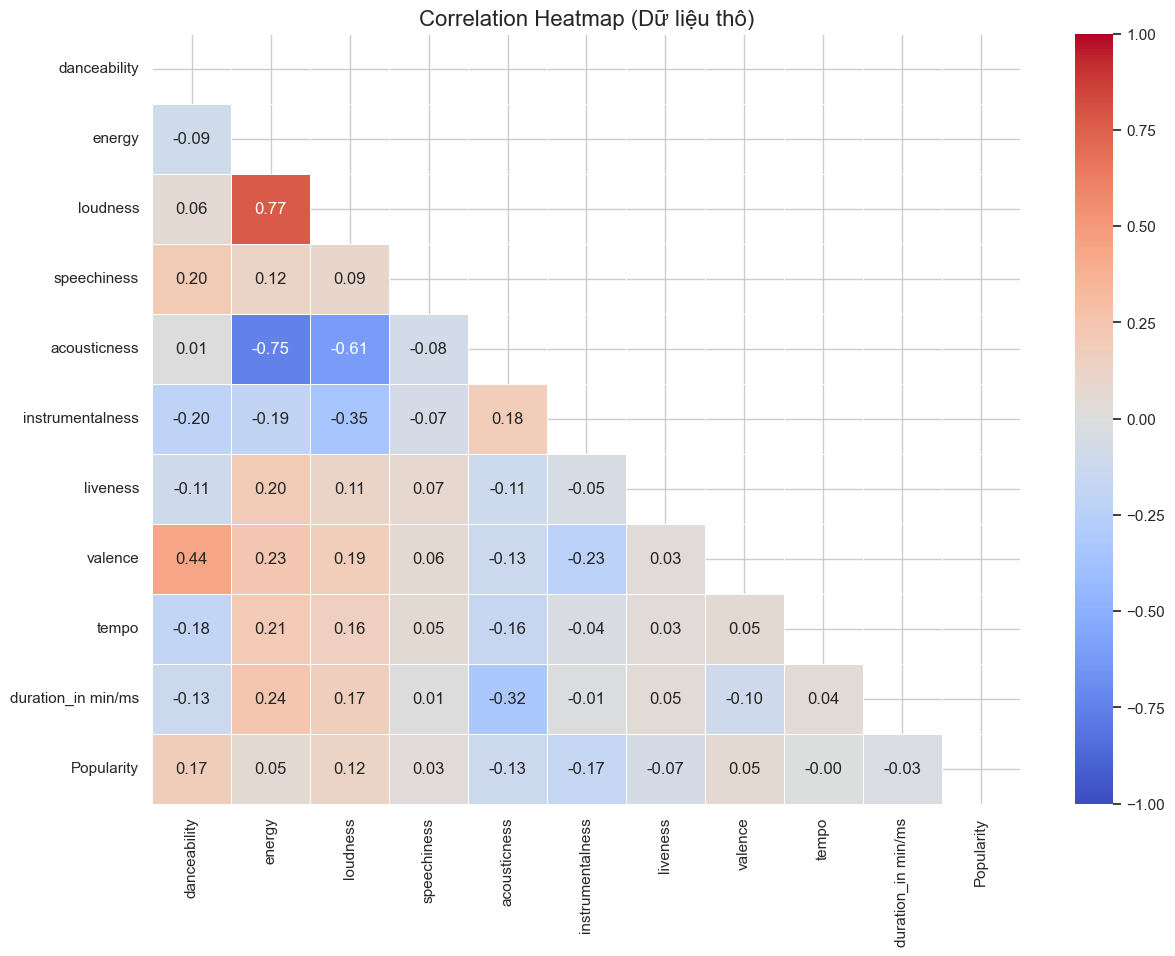


=== CÁC CẶP FEATURE CÓ TƯƠNG QUAN MẠNH (> 0.85) ===
✅ Chưa phát hiện cặp nào vượt quá ngưỡng 0.85.

✅ Đã ghi log vào file: ../reports/eda_log.xlsx


In [13]:
# Tính ma trận tương quan
corr_matrix = df_train[num_cols].corr()

# Vẽ Heatmap
plt.figure(figsize=(14, 10))
# Tạo mặt nạ (mask) để che nửa trên tam giác (đỡ rối mắt)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, linewidths=0.5)

plt.title('Correlation Heatmap (Dữ liệu thô)', fontsize=16)
plt.show()

# Tự động in ra các cặp có tương quan > 0.85 (Ngưỡng cảnh báo)
print("\n=== CÁC CẶP FEATURE CÓ TƯƠNG QUAN MẠNH (> 0.85) ===")
high_corr_flag = False
high_corr_pairs = []
# Duyệt qua ma trận tam giác dưới
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        val = corr_matrix.iloc[i, j]
        if abs(val) > 0.85:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            print(f"🔴 {col1} vs {col2}: {val:.4f}")
            high_corr_pairs.append(f"{col1} vs {col2}: {val:.4f}")
            high_corr_flag = True

if not high_corr_flag:
    print("✅ Chưa phát hiện cặp nào vượt quá ngưỡng 0.85.")

# Ghi log vào Excel
new_log = pd.DataFrame({
    'Thời gian': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')],
    'Hành động': ['Vẽ Correlation Heatmap cho 11 biến số để kiểm tra đa cộng tuyến - Tìm các cặp feature có tương quan > 0.85 để xử lý'],
    'Kết luận': [f"Mối tương quan mạnh nhất là energy-loudness (0.77), acousticness-energy (-0.75). {'Không phát hiện cặp nào vượt ngưỡng 0.85 (đa cộng tuyến nghiêm trọng)' if not high_corr_flag else f'Phát hiện đa cộng tuyến: {", ".join(high_corr_pairs)}'}, có thể giữ nguyên. Popularity không tương quan với các đặc trưng âm thanh (hệ số ~ 0), cần mô hình phi tuyến để khai thác."]
})

# Kiểm tra file đã tồn tại chưa
if os.path.exists(log_file):
    existing_log = pd.read_excel(log_file)
    updated_log = pd.concat([existing_log, new_log], ignore_index=True)
else:
    updated_log = new_log

# Lưu vào Excel
updated_log.to_excel(log_file, index=False, engine='openpyxl')
print(f"\n✅ Đã ghi log vào file: {log_file}")

Nhận xét:

Mối tương quan mạnh nhất nằm ở cặp energy và loudness với hệ số dương 0.77 phản ánh đúng thực tế là các bài hát năng lượng cao thường đi kèm âm lượng lớn, tuy nhiên con số này vẫn nằm dưới ngưỡng báo động đỏ về đa cộng tuyến (thường là > 0.85 hoặc 0.9) nên bạn chưa nhất thiết phải loại bỏ một trong hai cột ngay lúc này mà có thể giữ lại để mô hình cây (như Random Forest) tự chọn lọc; một mối tương quan âm rất mạnh đáng chú ý là giữa acousticness và energy (-0.75) cho thấy sự đối lập rõ rệt giữa nhạc mộc và nhạc điện tử/rock giúp ích rất lớn cho việc phân loại; cặp danceability và valence có tương quan dương mức trung bình (0.44) ám chỉ nhạc dễ nhảy thường mang sắc thái vui tươi tích cực; điểm đặc biệt là biến Popularity có hệ số tương quan gần như bằng 0 với tất cả các đặc trưng âm thanh còn lại, điều này báo hiệu rằng độ phổ biến của bài hát không phụ thuộc tuyến tính vào việc nó "nhanh hay chậm", "vui hay buồn" mà có thể phụ thuộc vào yếu tố phi tuyến tính hoặc danh tiếng nghệ sĩ, đòi hỏi các mô hình phức tạp hơn để khai thác.

## EDA theo từng thể loại nhạc

1. Density Plot: So sánh các đối cực

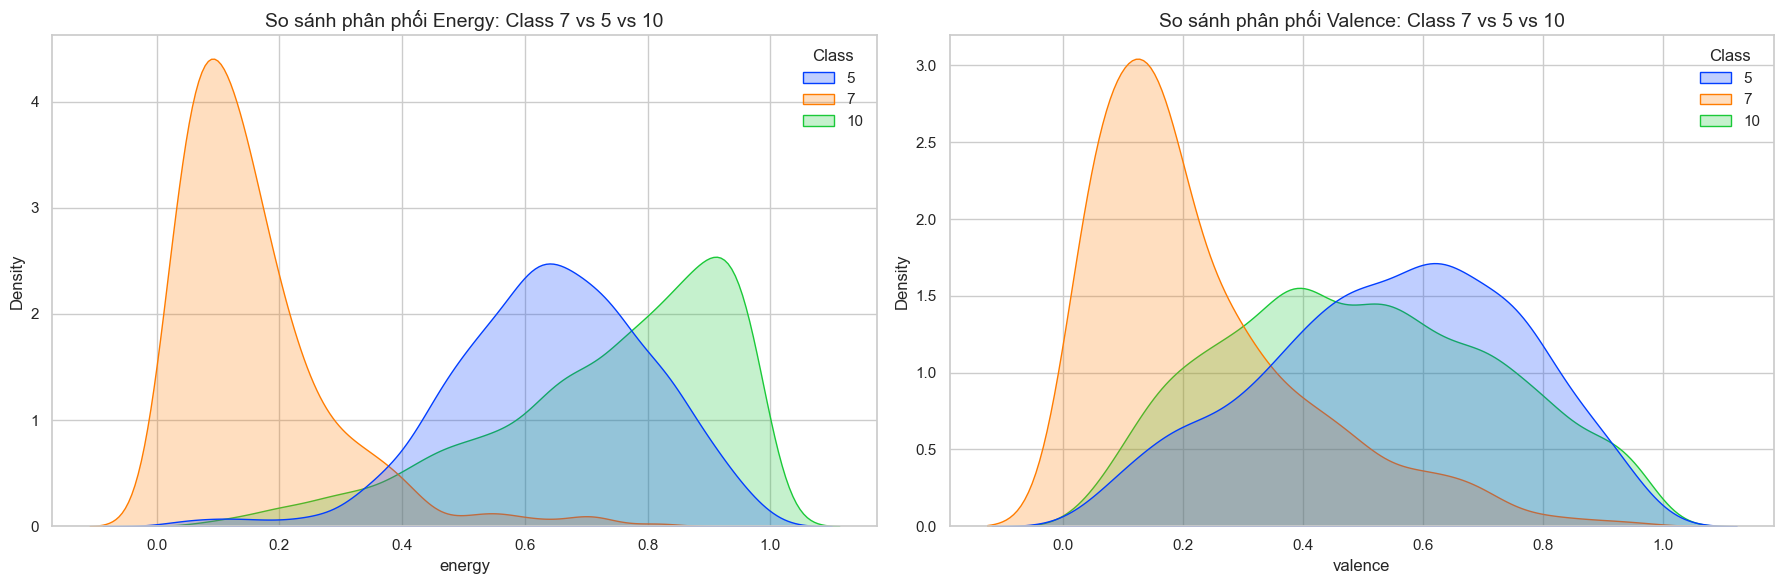


✅ Đã ghi log vào file: ../reports/eda_log.xlsx


In [14]:
# Chọn 3 Class tiêu biểu để so sánh
target_classes = [7, 10, 5] 
subset = df_train[df_train['Class'].isin(target_classes)]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. So sánh Energy (Năng lượng)
sns.kdeplot(data=subset, x='energy', hue='Class', fill=True, palette='bright', common_norm=False, ax=axes[0])
axes[0].set_title('So sánh phân phối Energy: Class 7 vs 5 vs 10', fontsize=14)

# 2. So sánh Valence (Độ tích cực)
sns.kdeplot(data=subset, x='valence', hue='Class', fill=True, palette='bright', common_norm=False, ax=axes[1])
axes[1].set_title('So sánh phân phối Valence: Class 7 vs 5 vs 10', fontsize=14)

plt.tight_layout()
plt.show()

# Ghi log vào Excel
new_log = pd.DataFrame({
    'Thời gian': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')],
    'Hành động': ['Vẽ Density Plot (KDE) so sánh phân phối Energy và Valence giữa 3 Class đối cực (Class 7, 5, 10) để xác định khả năng phân loại'],
    'Kết luận': ['Class 7 tách biệt hoàn toàn với Energy cực thấp (<0.2), Class 10 có Energy cao nhất (~0.9), Class 5 ở mức trung bình (~0.6). Energy là đặc trưng phân loại mạnh nhất. Valence có chồng lấn lớn giữa Class 5 và 10, nhưng kết hợp với Energy sẽ tạo ranh giới quyết định tốt.']
})

# Kiểm tra file đã tồn tại chưa
if os.path.exists(log_file):
    existing_log = pd.read_excel(log_file)
    updated_log = pd.concat([existing_log, new_log], ignore_index=True)
else:
    updated_log = new_log

# Lưu vào Excel
updated_log.to_excel(log_file, index=False, engine='openpyxl')
print(f"\n✅ Đã ghi log vào file: {log_file}")

Nhận xét:

Biểu đồ mật độ xác nhận sự phân cực mạnh mẽ và khả năng phân loại tuyệt vời của đặc trưng Energy khi Class 7 (màu cam) hoàn toàn tách biệt khỏi hai nhóm còn lại với đỉnh nhọn tập trung ở vùng giá trị rất thấp (dưới 0.2) cho cả Energy và Valence, khẳng định đây là dòng nhạc êm dịu, trầm lắng và mang tính "tĩnh" cao (như Classical hoặc Acoustic); ngược lại Class 10 (màu xanh lá) đại diện cho sự sôi động với đỉnh Energy tiệm cận 0.9, trong khi Class 5 (màu xanh dương) đóng vai trò trung gian với mức năng lượng khoảng 0.6; đáng chú ý là dù Valence có sự chồng lấn (overlap) lớn giữa Class 5 và 10 khiến việc phân biệt dựa trên cảm xúc trở nên khó khăn, thì Energy lại bù đắp hoàn hảo bằng cách kéo giãn khoảng cách giữa các đỉnh, giúp mô hình dễ dàng vẽ ra ranh giới quyết định (decision boundary) để cô lập Class 7 và phân tách rạch ròi giữa Class 5 với Class 10.

## Kiểm tra outliers


In [15]:
# Ghi log vào Excel
new_log = pd.DataFrame({
    'Thời gian': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')],
    'Hành động': ['Kiểm tra Outliers bằng IQR và Z-score cho 3 biến số (instrumentalness, duration_ms, tempo) - Vẽ Boxplot và tính toán số lượng outliers để xác định chiến lược xử lý'],
    'Kết luận': ['instrumentalness có 13.48% outliers theo IQR nhưng đây là đặc trưng tự nhiên (nhạc không lời) nên KHÔNG xóa để bảo toàn Class 7. duration_ms chứa outliers thực sự nguy hiểm (205 cases Z>3, max=1.8M ms ~ 30 phút) cần áp dụng Capping (giới hạn trần ~600,000ms). tempo rất sạch (0.22% outliers, range 30-217 BPM hợp lý) giữ nguyên.']
})

# Kiểm tra file đã tồn tại chưa
if os.path.exists(log_file):
    existing_log = pd.read_excel(log_file)
    updated_log = pd.concat([existing_log, new_log], ignore_index=True)
else:
    updated_log = new_log

# Lưu vào Excel
updated_log.to_excel(log_file, index=False, engine='openpyxl')
print(f"\n✅ Đã ghi log vào file: {log_file}")



✅ Đã ghi log vào file: ../reports/eda_log.xlsx


Nhận xét:

Kết quả phân tích cho thấy instrumentalness đang báo hiệu một lượng lớn outliers giả tạo (chiếm 13.48% theo IQR) do phân phối lệch hẳn về 0, tuy nhiên đây là đặc điểm tự nhiên cốt lõi phân biệt nhạc có lời và không lời nên tuyệt đối không được xóa để bảo toàn Class 7; ngược lại duration_ms chứa các điểm dị biệt thực sự đáng lo ngại với các bài hát kéo dài tới gần 1.8 triệu ms (khoảng 30 phút) và 205 trường hợp Z-score > 3, đòi hỏi bạn phải áp dụng kỹ thuật Capping (gán trần/sàn) (ví dụ: đưa các giá trị > 600,000ms về 600,000ms) để tránh làm lệch mô hình; riêng tempo có dữ liệu rất sạch với tỉ lệ outlier không đáng kể (0.22%) và dải giá trị từ 30 đến 217 BPM hoàn toàn phù hợp với lý thuyết âm nhạc nên có thể giữ nguyên.